<img src="logo.png",width=200,height=200>

# Generando inferencias con datos

> __Alcances de la lectura__:
> * Conocer las funcionalidades avanzadas de gráficos estáticos mediante `seaborn`.
> * Aprender a segmentar datos y los principales criterios de estratificación.
> * Conocer los principales criterios de transformación de variables.
> * Aplicar funciones a columnas de datos mediante `ufuncs`, `map-reduce-filter`.
> * Entender e interpretar la correlación a partir de diagramas de dispersión.
> * Entender el marco inferencial frecuentista de las hipótesis.
> * Conocer la distribución t de Student y su aplicación.
> * Aplicar pruebas de hipótesis simples en el contexto de la inferencia.

* Durante esta lectura aprenderemos sobre el proceso inferencial de la estadística. Por inferencial hacemos referencia a los mecanismos que nos permiten aprender sobre los datos cuando tenemos información incompleta, situación que es la norma.
* La semana pasada aprendimos sobre las variables aleatorias, leyes matemáticas que nos ayudan a entender el comportamiento de la muestra en base a una función probabilística. También aprendimos a generar puntajes z que miden la ubicación de una observación respecto a la media, medida en desviaciones estándares.
* Resulta que para generar inferencias y pruebas de hipótesis, tenemos todos los elementos necesarios. Solo nos falta incluírlos.
* También aprenderemos a refactorizar gráficos mediante `seaborn`, una librería que sintetiza las buenas prácticas del análisis en una serie de funciones que trabajan considerando `pandas`, `numpy` y `matplotlib`.
* Con los gráficos de `seaborn` hablaremos sobre los diagramas de dispersión y la correlación, piedra angular del trabajo estadístico moderno
* Para ello seguiremos trabajando con la base de datos _Quality of Government_.

In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos    

In [2]:
# importamos la base de datos
df = pd.read_csv('qog_std_cs_jan18.csv')

## Refactorizando nuestros gráficos

* Retomemos el ejemplo trabajado la semana pasada, donde analizamos el Índice de Desarrollo Humano.
* Una de las primeras cosas que observamos es que la medición `undp_hdi` presentaba valores perdidos. Para limpiar nuestra columna, utilizabamos el método `dropna()`.
* Posteriormente utilizamos un histograma para observar la distribución de los casos. Generemos la figura de nuevo.

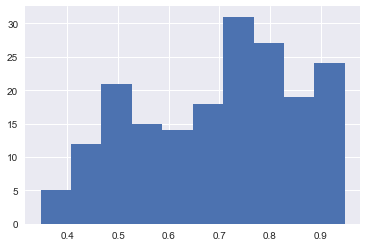

In [3]:
plt.hist(df['undp_hdi'].dropna());

* Resulta que podemos mejorar de forma substancial la presentación de nuestra figura mediante `seaborn`.
* `seaborn` contiene el método `distplot` que genera el mismo histograma, con una curva de densidad empírica que visualiza cómo se comporta la distribución. Pasaremos una serie de opciones en la función para implementar una serie de mejoras:
    - `rug=True` grafica el poscionamiento específico de cada observación a lo largo del eje X.
    - `fit=stats.norm` agrega una curva siguiendo una distribución especificada. En este caso agregamos una curva gaussiana siguiendo $X\sim\mathcal{N}(\bar{hdi}, \sigma(hdi))$.
    - `axlabel="Indice de Desarrollo Humano` agrega un título en el eje x.
    - `color=sienna` cambia el color del histograma y la curva empírica.

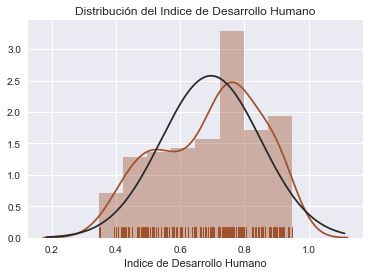

In [4]:
sns.distplot(df['undp_hdi'].dropna(), rug=True,
             axlabel="Indice de Desarrollo Humano",
             fit=stats.norm, color='sienna').set_title('Distribución del Indice de Desarrollo Humano');

* Ahora refactorizemos el gráfico de barras que muestra el tamaño de cada región en la muestra. El gráfico original se realizaba con la siguiente línea

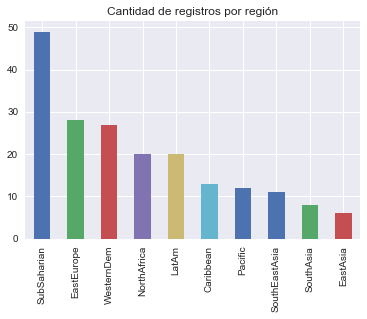

In [5]:
# generemos una variable para agregar los nombres asociados a cada número
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                    ['EastEurope', 'LatAm', 'NorthAfrica',
                                    'SubSaharian', 'WesternDem', 'EastAsia',
                                    'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
# gráficamos en barras el resultado de value_counts.
df['region_recod'].value_counts().plot(kind='bar').set_title('Cantidad de registros por región');

* `seaborn` ofrece el método `countplot` para realizar un gráfico de barras donde se cuenta la cantidad de observaciones en cada valor único. De esta manera no resulta necesario el pedir `value_counts()` de la columna a analizar.
* Incluímos `value_counts().index` para poder ordenar las barras. 

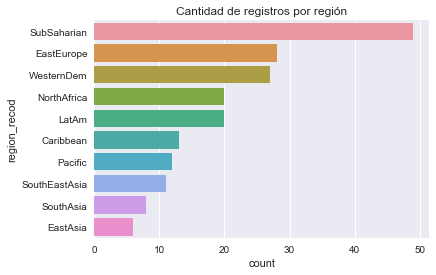

In [6]:
sns.countplot(y= df['region_recod'],
             order = df['region_recod'].value_counts().index).set_title('Cantidad de registros por región');

* La gracia de `countplot` es que permite segmentar de forma directa, sin necesidad de estar generando objetos intermedios para el preprocesamiento de datos.
* En el siguiente gráfico vamos a graficar la cantidad de democracias o dictaduras __dentro__ de cada región.
* Para ello incluímos `hue=df['democracies']`, indicando la forma de segmentar.

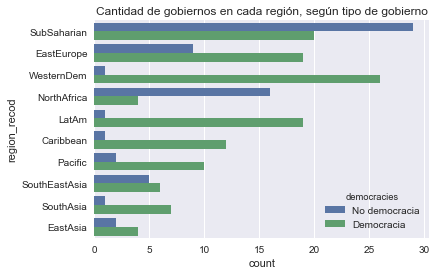

In [7]:
# generamos una recodificación binaria con np.where
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')


sns.countplot(y = df['region_recod'], hue=df['democracies'],
             order = df['region_recod'].value_counts().index).set_title('Cantidad de gobiernos en cada región, según tipo de gobierno');

* Ahora visualizemos la distribución de los puntajes del índice de desarrollo humano. A diferencia de nuestro gráfico de puntos donde visualizamos las medias, el gráfico generado con `swarmplot` muestra cada observación de forma separada.
* El método requiere de dos argumentos obligatorios:
    - `y=df['region_recod']`: En este caso nuestro eje Y (vertical) va a representar cada uno de los grupos.
    - `x=df['undp_hdi']`: El eje X representa los valores del índice de desarrollo humano para cada observación.

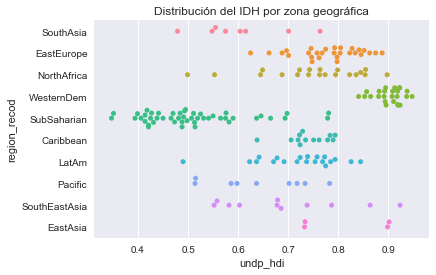

In [8]:
sns.swarmplot(y=df['region_recod'], x=df['undp_hdi']).set_title('Distribución del IDH por zona geográfica');

* Resulta que para `swarmplot` y otros métodos de `seaborn`, el orden entre `x` e `y` depende de cómo desamos presentar la información. Intercambiemos el orden y agregemos `hue=df['democracies']` para identificar si cada observación es democracia o dictadura.

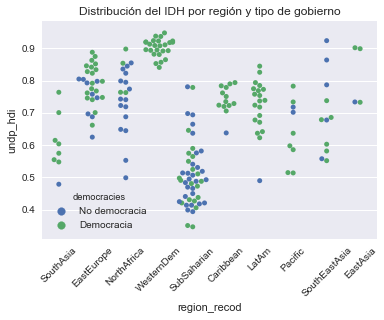

In [9]:
plt.xticks(rotation = 45)
sns.swarmplot(x=df['region_recod'], y=df['undp_hdi'], hue = df['democracies']).set_title(
'Distribución del IDH por región y tipo de gobierno');

## FacetGrid

* `FacetGrid` se utiliza para graficar múltiples figuras que comparten ejes, y cada figura está condicionada por un valor en específico. Técnicamente, `FacetGrid` es una clase que genera un objeto que permite asociar un DataFrame de `pandas` con una estructura particular de una figura de `matplotlib`.
* La idea general de FacetGrid es generar una forma canónica de gráficos que se repita en múltiples espacios reducidos.
* El flujo de trabajo básico con `FacetGrid` es:
    1. Iniciar un objeto `FacetGrid` declarando el DataFrame y las variables para estructurar la grilla.
    - Aplicar una o más funciones de gráficos mediante los métodos `.map()` o `.map_dataframe()` del objeto `FacetGrid`.
    
#### Iniciar un objeto FacetGrid

* `seaborn.FacetGrid` necesita de 3 argumentos como mínimo: un objeto `DataFrame`, una columna del `DataFrame` que informe al objeto sobre la cantidad de cuadros a desarrollar, y un argumento `col_wrap` que define la cantidad de columnas.
* Tomemos el siguiente ejemplo: deseamos dividir nuestro espacio a lo largo de todas las categorías de la variable `df['gol_inst']`. El resultado que nos indica es 4 valores únicos.

In [10]:
df['gol_inst'].value_counts()

0.0    54
2.0    41
1.0    32
4.0     2
Name: gol_inst, dtype: int64

* Si deseamos generar una serie de gráficos de dimensiones 2 x 2, podemos hacer lo siguiente:
    1. El primer parámetro es el nombre de la tabla.
    - El segundo parámetro es el nombre de la columna para utilizar como referencia.
    - El tercer parámetro es el dimensionado

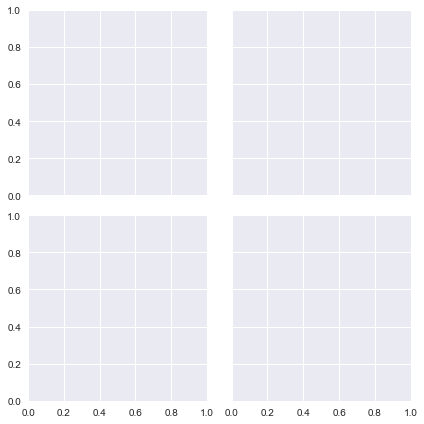

In [11]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap = 2)

#### Aplicar gráficos a nuestro objeto

* Una vez iniciado, nuestro objeto tendrá la opción `.map` para aplicar una función a cada cuadrante del área del gráfico.
* El primer argumento de `map` debe ser la función. Ésta puede ser de `matplotlib`, `seaborn` u otra librería. La llamada sólo debe incluir el nombre de la función. No hay que pasar los parámetros.
* El segundo argumento de `map` es la variable a graficar. En este ejemplo vamos a utilizar `distplot`, por lo que sólo necesitamos una columna. En este caso será `undp_hdi`.
* Posterior a los dos argumentos obligatorios, se pueden incorporar argumentos que modifican 

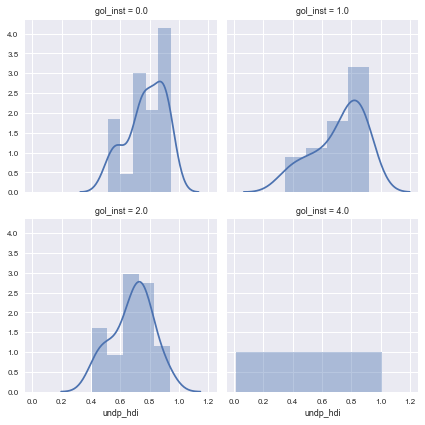

In [12]:
sns.set(font_scale=0.8) # Escalamiento de los titulos para que no sean tan grandes

grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)

axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
axes[0].set_title('gol_inst = 0.0')
axes[1].set_title('gol_inst = 1.0')
axes[2].set_title('gol_inst = 2.0')
axes[3].set_title('gol_inst = 4.0')

grid = grid.map(sns.distplot, "undp_hdi")


* Al visualizar los histogramas, observamos que las distribuciones del índice de desarrollo humano tienden a ser similares entre los regímenes parlamentarios (`gol_inst=0.0`), semi-presidenciales (`gol_inst=1.0`) y presidenciales (`gol_inst=2.0`). Se observa que los regímenes presidenciales tienden a presentar niveles de desarrollo más bajo, en comparación a los regímenes parlamentarios y semi parlamentarios.

* Con respecto al error, si investigamos un poco, encontraremos que el error con el que nos topamos se produce cuanto un método se encuentra con un argumento de largo nulo, el error se produce específicamente al graficar la distribución del Índice de Desarrollo Humano para las dictaduras militares (`gol_inst=4.0`), analicemos los datos que debían ser graficados:


In [13]:
print('Cantidad de dictaduras militares registradas: %d' %len(df.loc[df['gol_inst'] == 4.0]))
print('Cantidad de NaN en la columna \'undp_hdi\' para las dictaduras militares: %d' 
      %df.loc[df['gol_inst'] == 4.0]['undp_hdi'].isnull().sum())

Cantidad de dictaduras militares registradas: 2
Cantidad de NaN en la columna 'undp_hdi' para las dictaduras militares: 1


* Existen tan solo dos registros de dictaduras militares en todo el dataset de los cuales uno tiene `NaN` en la columna `undp_hdi`, por lo tanto era de esperarse que el método `sns.distplot()` no pudiese graficarlo. (Obs: La razón no es porque haya un `NaN` en los registros, sino porque al final le estabamos pidiendo que graficase un solo valor en lugar de una serie de valores, que es lo que el método espera recibir como input. El método `sns.distplot()` por defecto ignora los valores `NaN`)
* La baja cantidad de dictaduras militares (`gol_inst=4.0`) nos impide sacar cualquier conclusión general válida con respecto al Índice de Desarrollo Humano de este tipo de gobiernos.

## Scatterplots

* Un scatterplot (o diagrama de dispersión) es una visualización que presenta observaciones de una base de datos mediante coordenadas cartesianas para dos variables.
* Cada punto en la colección de puntos visualizada en el plano cartesiano 
* __Algunas formalidades__:
    - Eje X, se posiciona en la línea horizontal. Se le conoce como Eje de Abscisas y corresponde a la variable independiente en el contexto de regresión.
    - Eje Y, se posiciona en la línea vertical. Se le conoce como Eje de Ordenadas y corresponde a la variable dependiente en el contexto de regresión.
    
* El siguiente código es la implementación de un diagrama de dispersión utilizando `matplotlib`. El método `plt.scatter` necesita de dos argumentos obligatorios, nuestro eje X e Y. 
* En el eje X vamos a utilizar nuestra variable _Índice de Desarrollo Humano_, y en el eje Y utilizaremos el indicador de la Calidad de Gobierno. El objetivo es evaluar la asociación existente entre ambas mediciones. Valores mayores en el Indicador de la Calidad de Gobierno indican mejor calidad.

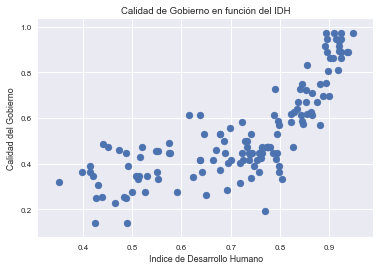

In [14]:
# generamos el gráfico 
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

* A simple vista, el gráfico enseña que en la medida que el índice de desarrollo humano va aumentando en la escala, la calidad del gobierno mejora de igual manera. Este comportamiento se conoce como una _relación directamente proporcional_. Esto nos servirá para hablar de medidas de asociación.

### Refactorizando el gráfico 

* Resulta que el gráfico se puede mejorar de forma substancial al incluir una recta que resuma la tendencia, e identificar los países.
* Para generar una recta utilizando sólo `matplotlib` necesitamos estimar un intercepto y pendiente. Ésto se puede lograr de variadas formas, pero para evitar hablar de regresión, utilizaremos el método `np.polyfit` de `numpy`. El método requiere especificar los ejex X e Y de la relación bivariada y la cantidad de términos a estimar. Dado que buscamos una recta lineal, sólo necesitamos un término.

In [15]:
# Separemos las columnas a trabajar y eliminemos los datos perdidos.
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
# calculamos los valores de la recta
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)

# pidamos los valores
print("La pendiente es de: ", pendiente.round(3))
print("El intercepto es de: ", intercepto.round(3))

La pendiente es de:  1.008
El intercepto es de:  -0.195


* Para graficar la recta, necesitamos calcular los valores para cada nivel del índice de desarrollo humano. Esto lo podemos hacer mediante una list comprehension.

> __Digresión:__ Comprensiones de Lista
>
> * Las _list comprehension_ forman parte del __python idiomático__. Son un híbrido entre un loop `for` y una `lista`. El fin es generar nuevas listas de una forma concisa y elegante.
> * Una _list comprehension_ general tiene una estructura canónica:
>
> ```python
[<expresion_a_evaluar> <for <variable> in <secuencia_de_valores>>]
```
>
> * Esto nos ahorra tiempo y líneas en estar generando objetos para guardar los resultados de un loop.



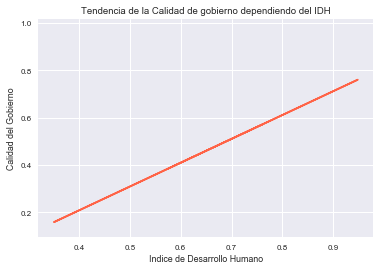

In [16]:
# para separar los elementos del gráfico, generamos dos objetos a partir de subplots
fig, ax = plt.subplots()

# generamos el gráfico, declaramos que los puntos sean lo más pequeños posible con marker="," y s=.1
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)

# graficamos la recta a lo largo de undp_hdi
ax.plot(scatter_data['undp_hdi'],
         # generamos un list comprehension que calcule el valor de la recta a lo largo de undp_hdi
        [pendiente * j + intercepto for j in scatter_data['undp_hdi']],
        color='tomato')
ax.set_title('Tendencia de la Calidad de gobierno dependiendo del IDH')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

* Hasta ahora nuestro gráfico tiene la recta, pero no tenemos las observaciones etiquetadas. Vamos a generar las anotaciones mediante el método `text`, el cual dependerá del objeto `ax` que creamos con `subplots`.
* Para este caso utilizamos un loop `for` clásico porque no necesitamos guardar los valores en una lista, si no el repetir la instrucción `text`  por cada observación en nuestro dataframe.
* La sintáxis es la siguiente:

```python
for i in scatter_data.index:
    ax.text(
        scatter_data.loc[i, 'undp_hdi'],
        scatter_data.loc[i, 'icrg_qog'], 
        str(scatter_data.loc[i, 'ccodealp'])
        )
```

* Utilizamos `.loc` para acceder a las observaciones específicas, y soliticamos al loop que recorra por el índice del DataFrame. Al juntar todo el código, queda lo sigueinte

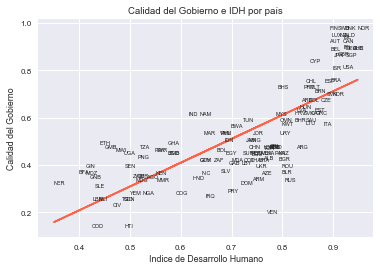

In [17]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)

ax.plot(scatter_data['undp_hdi'],
        [pendiente * j + intercepto for j in scatter_data['undp_hdi']],
        color='tomato')


for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'],
            scatter_data.loc[i, 'icrg_qog'],
            str(scatter_data.loc[i, 'ccodealp']),
           fontsize = 5.5)

ax.set_title('Calidad del Gobierno e IDH por país')    
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

* El gráfico nos informa de la posición de países como Haití, con un nivel bajo de desarrollo humano y de calidad de gobierno, así como de un cluster importante de países con niveles de desarrollo humano sobre el .90 y calidad de gobierno substancialmente alto.

### Refactorización con `seaborn`

* Volviendo a la librería `seaborn`, resulta que presenta un método llamado `jointplot` que permite realizar una diagrama de dispersión con más información. 
* De manera similar al ejemplo con `matplotlib`, necesitamos declarar nuestros eje X e Y.

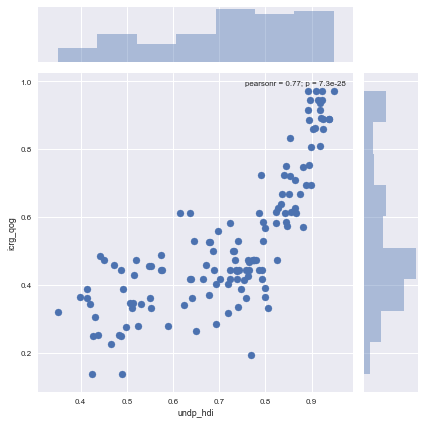

In [18]:
sns.jointplot(df['undp_hdi'], df['icrg_qog']);

* A parte de la nube de puntos visualizada, la figura incluye información sobre la distribución de cada variable resumida en forma de histogramas.
* Para agregar una recta de ajuste, simplemente agregamos el argumento `kind = 'reg'` a `jointplot`.

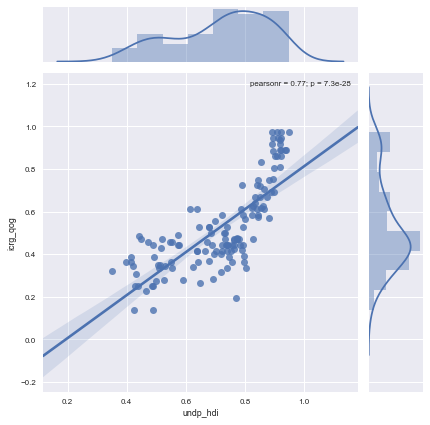

In [19]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'], kind='reg');

* E reporta un estadístico `pearsonr = 0.77; p = 1.8e-25`. La primera cifra resume la intensidad y dirección de la asociación, mientras que la segunda reporta su _plausibilidad_ bajo condiciones similares. 
* El primer elemento se conoce como _Correlación de Pearson_, y el segundo como _p Value_. Dedicaremos el resto de la lectura a estudiarlos.

## Correlación y Covarianza

* La correlación y covarianza son piedras angulares en el desarrollo de métodos más sofisticados, permitiendo establecer asociaciones _a priori_.
* El único objetivo de la correlación y covarianza en cuantificar el grado en que dos variables viajan juntas.

* __Covarianza__: Se obtiene a partir del producto de las diferencias de las variables y sus respectivas medias.

$$
\text{Covarianza}(x, y) = \frac{1}{N-1}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})
$$

* Hay disciplinas que la interpretan como un indicador importante. Pero para efectos prácticos del curso, asumiremos que es un estadístico procedimental. Esto se debe a que la covarianza tiene límites ($-\infty, + \infty$), lo cual dificulta su interpretación y comparación entre indicadores.

* __Correlación__: Para resolver el problema de los límites de la covarianza, la correlación restringe los límites a $-1 \leq \rho \leq 1$. Esto se logra ajustando la covarianza por la raíz de la varianza de ambas variables.
* Por lo general cuando hablamos de correlación, presentamos las correlaciones de Pearson.

$$
\text{Correlación}(x, y) = \frac{\text{Covarianza}(x, y)}{\sqrt{\text{Varianza}(x)}\sqrt{\text{Varianza(Y)}}}
$$

* Varía entre 0 (ausencia de relación) a 1 (relación perfecta directamente proporcional) o -1 (relación perfecta inversamente proporcional).
* Algunas salvedades:
    - El valor de $\rho$ no depende de las unidades de medición.
    - Tampoco depende de qué variable se denomina $x$ e $y$
    

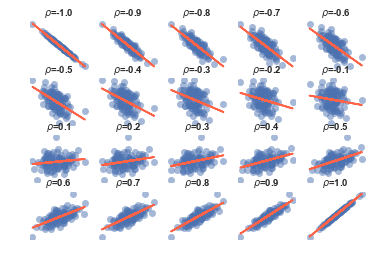

In [20]:
gfx.generate_corr_matrix();

* El gráfico creado con `gfx.generate_corr_matrix()` ilustra distintos niveles y pendientes de la correlación:
    - Cuando las magnitudes de la correlación son fuertes ($|\rho| \geq .8$), la nube de datos tenderá a agruparse entorno a la recta, indicando una relación donde la mayoría de los datos obedecen la dirección.
    - Cuando las correlación son marginalmente nulas ($|\rho| \leq .5$), la pendiente de la recta tiende a ser menos pronunciada y la dispersión de la nube de datos tiende a ser mayor.

* Retomemos el ejemplo de la correlación entre el índice de desarrollo humano y la calidad del gobierno. El gráfico de `seaborn` nos indicaba que su `pearsonr` era de .77. Esperamos que en la medida que aumenten los valores del índice de desarrollo humano, también lo hagan los valores de la calidad de gobierno.
* Cabe destacar que `pandas` también ofrece una forma de calcular la correlación con `corr`. Este es un método dependiente de una serie, donde pasamos como argumento la segunda variable a correlacionar.

In [21]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965881996

* Un punto a considerar en la construcción de medidas de correlación entre variables es su naturaleza. Una práctica usual es utilizar la fórmula de Pearson para medir asociación de forma indiscriminada entre las variables.
* Dado que el tipo de variable indica cómo podemos generar medidas de varianza, aplicar la fórmula de Pearson sin considerar estos elementos conlleva a problemas de estimación, dada la atenuación de la varianza.
* Anders Skrondal y Sophia Rabe-Hesketh (2004, 126) ofrecen una nomenclatura para calcular correlaciones bivariadas entre dos variables, considerando su naturaleza. Así, los principales modos están dominados por sus características.


 | | Contínua | Dicotómica | Ordinal | Censurada | 
 |---|---|---|---|---| 
 |Contínua | Pearson | | | |
 |Dicotómica | Biserial | Tetracórica | | |
 |Ordinal | Poliserial | Policórica | Policórica | |
 |Censurada | Tobitserial | Bitobit | Politobit | Tobit|
 
* `scipy.stats` ofrece métodos para cada una de ellas. 
    
> __Digresión__: Correlación no implica causalidad.
>
> * Una de las primeras cosas que se menciona respecto a la correlación es que no conduce de forma estricta a inferir causalidad.
> * La correlación es una medida de asociación que no discrimina entre el proceso causal de __cuál variable afecta a la otra__.
> * Así nos encontramos frente a correlaciones espúreas, la asociación entre dos variables por motivos estrictamente matemáticos, cuya asociación no resiste análisis teórico. Pueden ver ejemplos de correlaciones causales en el siguiente link [http://www.tylervigen.com/spurious-correlations](http://www.tylervigen.com/spurious-correlations).
> * Quizás la disciplina que se preocupa más de establecer causalidad son los economistas experimentales, quienes implementan estrategias de inferencia desde el diseño muestral, por sobre la modelacieon econométrica. 
> * Pueden saber 10 cosas sobre la inferencia causal en el siguiente link : [http://egap.org/methods-guides/10-things-you-need-know-about-causal-inference](http://egap.org/methods-guides/10-things-you-need-know-about-causal-inference)


### Matrices de correlación

* `pandas` permite cruzar todas las variables de una base de datos para generar una matriz de correlaciones.
* Tomemos el siguiente ejemplo donde tenemos los promedios nacionales de una batería de preguntas administradas por la _World Value Survey_, encuesta a nivel mundial que mide el cambio en actitudes y valores de las sociedades.
* Separaremos todas las variables dentro de esta batería de preguntas mediante `df.loc`. En este caso utilizaremos un operador `slice` para seleccionar un rango de inicio y término.

In [22]:
wvs_subset = df.loc[: , 'wvs_auton':'wvs_trust']

* A este subset añadamos las variables de región y país. Finalmente eliminemos las observaciones que presentan valores perdidos con `.dropna()`

In [23]:
wvs_subset['region'] = df['region_recod']
wvs_subset['country'] = df['cname']
wvs_subset = wvs_subset.dropna()

* Para generar una matriz de correlación, el objeto `DataFrame` tiene un método llamado `corr` que devuelve una matriz.
* Al evaluar la matriz de correlaciones, tenemos el problema de que existe mucha información. Esto lo podemos resolver con `sns.heatmap`.

In [24]:
corr_mat = wvs_subset.corr()
# output omitido
# corr_mat

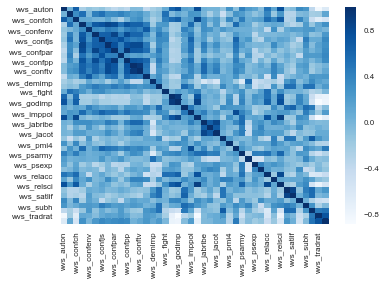

In [25]:
sns.heatmap(corr_mat, cmap='Blues');

* La información sigue siendo inteligible a simple vista. Es necesario el redefinir qué variables estamos interesados en analizar.
* Para este ejemplo, exploraremos las relaciones entre las creencias religiosas y felicidad de las naciones. Partamos por seleccionar las columnas con `.loc`:

In [26]:
working_subset = wvs_subset.loc[:, ['wvs_godbel', 'wvs_godimp', 'wvs_hap', 'wvs_imprel']]

Las variables que seleccionamos son:
* `wvs_godbel`: Porcentaje de gente que cree en Dios.
* `wvs_godimp`: Qué tan importante es Dios en la vida de las personas.
* `wvs_hap`: Felicidad reportada por los encuestados.
* `wvs_imprel`: Qué tan importante es la religión en la vida de las personas.

* Generemos la matriz de correlaciones:

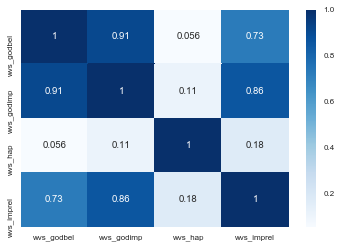

In [27]:
corr_mat = working_subset.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True);

* Observamos un par de patrones claros en las correlaciones:
    1. Hay correlaciones de una magnitud susbtancial entre la importancia de Dios, de la religión y la creencia a nivel mundial.
    - No hay correlaciones substanciales entre los niveles de felicidad reportados y la importancia asignada a la reglión en general.
    

## Matrices personalizadas con `PairGrid`

* De similar manera a como lo hicimos con `FacetGrid`, para personalizar una matriz de datos necesitamos generar un objeto con clase `PairGrid`. La grilla se compone de tres zonas: La diagonal principal (`map_diag`), el triángulo inferior (`map_lower`) y el triángulo superior (`map_upper`).
* Cada uno de los maps asignados al objeto aceptan métodos tanto de `matplotlib` como de `seaborn`. En este caso ocuparemos variantes más sofisticadas para relaciones bivariadas:
    1. `grid.map_diag(sns.distplot)`: En la diagonal principal asignamos el histograma de cada variable. Dado que la diagonal es la intersección del mismo elemento, es el lugar más claro para presentar información sobre la variable.
    - `grid.map_lower(sns.kdeplot, cmap="Blues_d")`: En el triángulo inferior se pide la _densidad de kernel_ de cada relación bivariada. Estos mapas de contorno resumen cómo se mueven los datos y dónde esperamos sus concentraciones mayores. `cmap="Blues_d"` sirve para declarar la paleta de colores empleada.
    - `grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':.5}, line_kws={'color': 'tomato'})`: El triángulo superior se incluye un diagrama de dispersión clásico con las siguientes especificaciones:
        - Los puntos presentados serán con un nivel de transparencia determinado por `scatter_kws:{'alpha':.5}`.
        - Con `lowess=True` grafica una recta no paramétrica que resume la asociación entre ambas variables omitiendo la imposición de la recta lineal. Para facilitar la visualización, la recta será de color rojo con `line_kws={'color': 'tomato'})`.
        

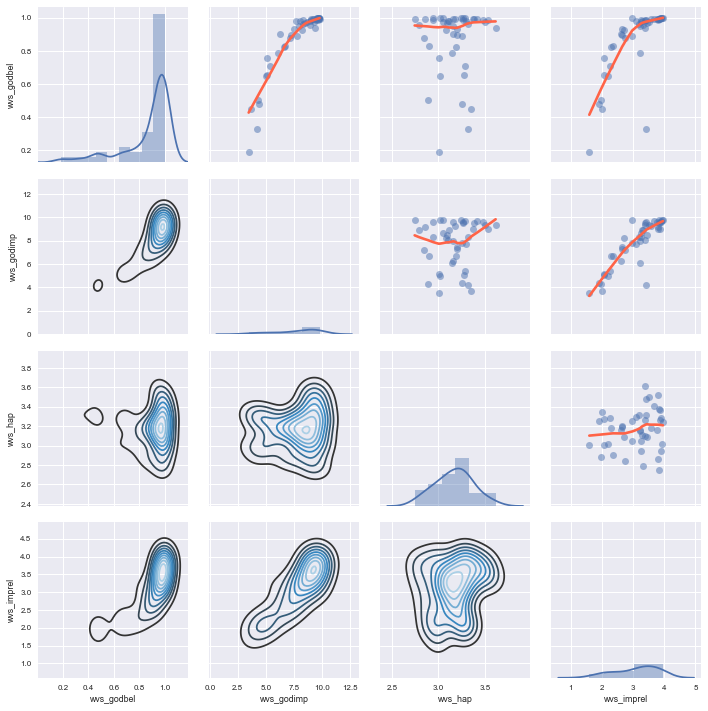

In [28]:
grid = sns.PairGrid(working_subset)
grid = grid.map_diag(sns.distplot)
grid = grid.map_lower(sns.kdeplot, cmap="Blues_d")
grid = grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':.5}, line_kws={'color': 'tomato'})

* Las figuras generadas con `kdeplot` enseñan dónde se concentran la mayor densidad de los casos. Para el caso de la relación entre el porcentaje de gente que cree en Dios (`wvs_godbel`), y el porcentaje de gente que cree que Dios es importante (`wvs_godimp`), observamos un patrón ascendente en la densidad conjunta. Esto da precedentes para esperar una correlación positiva.
* Si volvemos a nuestra figura generada con `heatmap`, la correlación entre ambas variables es de $\rho=.91$, indicando una fuerte asociación entre ambas variables.
* Esto también se ve con la figura generada con `regplot`, donde observamos que la nube de datos presenta una fuerte distribución lineal. La tendencia no paramétrica en rojo enseña que la asociación tiende a ser menos pronunciada cuando los valores son altos.
* Cuando cruzamos la información disponible sobre el porcentaje de gente que cree que Dios es importante (`wvs_godimp`) y el promedio de la felicidad reportada por los encuestados (`wvs_hap`) observamos una ausencia de patrón claro. La densidad de kernel sugiere una distribución substancialmente menos colapsada alrededor de una tendencia y la nube de datos falla en visualizar un patrón claro y la recta no paramétrica lucha por encontrar un significado. Volviendo a nuestro heatmap, la correlación de $\rho=.11$ sustenta esta ausencia de patrón.

> __Digresión:__ Sobre `map` y sus parientes.
>
> * Resulta que método `map` sirve para aplicar una función a todos los items en una lista.
> * Para este caso específico, `map` aplica las funciones `displot, kdeplot` y `regplot` a todas las columnas de nuestra submuestra.
> * `map` permite sintetizar un proceso en una línea de código.
> * Tomemos el siguiente ejemplo: Tenemos una lista con los dígitos del 1 al 10 y deseamos retornar cada elemento al cuadrado. La versión clásica del ésto se puede lograr mediante los siguientes pasos:
>
> 1. Generar una lista vacía que servirá para guardar cada elemento procesado.
- Iniciar un loop `for` para cada elemento.
- Dentro del cuerpo del loop vamos a elevarlo al cuadrado mediante `i ** 2`, y posteriormente lo adjuntaremos a la lista vacía.

In [29]:
lista_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

lista_al_cuadrado = []

for i in lista_1:
    lista_al_cuadrado.append(i ** 2)

print(lista_al_cuadrado)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


> * Con `map`, estos tres pasos se pueden sintetizar en una línea. El método hace uso  de `lambda` para pasar la función de forma anónima. Al final se envuelve en `list` para convertir el objeto a una lista.

In [30]:
lista_al_cuadrado_2 = list(map(lambda i: i ** 2, lista_1))

print(lista_al_cuadrado_2)

# Verifiquemos que ambas listas son iguales
lista_al_cuadrado == lista_al_cuadrado_2

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


True

> * También podemos generar el mismo resultado con una comprensión:

In [31]:
lista_al_cuadrado_3 = [value**2 for value in range(1,11)]

print(lista_al_cuadrado_3)

lista_al_cuadrado == lista_al_cuadrado_3

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


True

> #### Filter
>
>* Tomemos el siguiente ejemplo: Tenemos una lista de números [-10, 10] y deseamos extraer solo los elementos negativos. La versión clásica sigue una estructura similar al caso anterior del map
>
> 1. Generar una lista vacía que servirá para guardar cada elemento procesado.
- Iniciar un loop `for` para cada elemento.
- Dentro del cuerpo del vamos solicitar los elementos `i` menores a cero mediante `if` y posteriormente lo adjuntaremos a la lista vacía.

In [32]:
lista_2 = list(range(-10, 10))

negativos = []

for i in lista_2:
    if i < 0:
        negativos.append(i)
        
print(negativos)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


> * Con `filter` reducimos el procedimiento a una línea, donde aplicamos `lambda` de manera similar.

In [33]:
negativos_2 = list(filter(lambda i: i < 0, lista_2))

print(negativos_2, (negativos == negativos_2))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1] True


> * Nuevamente, lo podemos hacer con una comprensión de la siguiente forma:

In [34]:
negativos_3 = [value for value in lista_2 if value < 0]

print(negativos_3, (negativos == negativos_3))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1] True


> #### Reduce
>
> * Reutilizemos `lista_1`, lo que deseamos es encontrar la multiplicación de todos los elementos. La implementación clásica es similar a las anteriores.

In [35]:
producto = 1

for i in lista_1:
    producto *= i
    
print(producto)

3628800


> * `reduce` permite generar esto en una línea. Una salvedad es que no se encuentra implementado de forma nativa en python, por lo que es necesario importarlo desde la librería `functools` $\leadsto$ herramientas de programación funcional.

In [36]:
from functools import reduce

producto2= reduce(lambda x, y: x * y, lista_1)

print(producto2,(producto == producto2))

3628800 True


# Pruebas de Hipótesis

* Hasta ahora sabemos resumir la asociación entre dos variables. Otro aspecto relevante es considerar bajo qué condiciones nuestros procedimientos son válidos.
* Para probar la validez, hablamos de pruebas de hipótesis donde buscamos diferenciar de forma substancial el efecto estimado.
* Esta es la idea fundacional de la inferencia estadística (y de Data Science): __tomar decisiones o esclarecer juicios en base a información limitada.__

> __Digresión:__  Sobre la definición de Hipótesis:
> Se entiende como hipótesis un juicio empíricamente comprobable sobre la relación entre dos o más variables. En el proceso de juicio existe incertidumbre frente a esta relación dado que uno como investigador no está completamente seguro sobre su existencia bajo condiciones específicas.

## Ejemplo: Niveles de confianza interpersonal

* Imaginemos que nos preguntan si el nivel de confianza interpersonal a nivel mundial es distinto a .7. 
* Para desarrollar una prueba de hipótesis debemos generar dos enunciados a comprobar:
    1. La __hipótesis nula__: Es la hipótesis que establece que nuestro punto estimado es nulo (o en términos generales, que no hay efecto)
    2. La __hipótesis alternativa__: Es la hipótesis que nosotros como investigadores conjeturamos, donde establecemos el efecto a evaluar.
    
* En este caso, nuestra hipótesis nula es que __el nivel de confianza interpersonal no es distinto al criterio propuesto de .7__.
* Nuestro hipótesis alternativa es que __el nivel de confianza interpersonal es distinto al criterio propuesto de .7__

* Para generar una prueba de hipótesis necesitamos de tres componentes:
    1. Un estadístico de prueba que refleje un punto estimado por nosotros.
    2. Una distribución nula que refleje el nulo efecto de nuestro punto estimado.
    3. Un puntaje de corte o criterio arbitrario que permita evaluar nuestro estadístico de prueba.
    
* En este caso, nuestro __estadístico de prueba__ viene a ser la proporción estimada en la muestra. Nuestra __distribución nula__ en este caso será el criterio propuesto de .7. El __puntaje de corte__ hace referencia bajo qué condiciones estamos habiliados de rechazar la hipótesis nula.


### Calculando estadísticos de prueba
 
* Resulta que el primer paso para generar una prueba de hipótesis es similar a calcular un puntaje z. Las pruebas de hipótesis se basan en analizar el valor que toma el siguiente valor z:

$$
Z=\frac{\hat\theta-\boldsymbol\theta}{\sigma/\sqrt{n}}\Rightarrow\frac{\underbrace{\hat\theta}_{\text{Estimador Muestral}} - \underbrace{\boldsymbol\theta}_{\text{Valor Poblacional}}}{\underbrace{\sigma/\sqrt{n}}_{\text{Error Estándar}}}
$$

* $\hat\theta$ representa nuestro punto estimado que deseamos poner a prueba frente a otro valor.
* $\boldsymbol\theta$ representa nuestro valor poblacional a contrastar.
* $\sigma$ permite ajustar la diferencia entre el punto estimado y el valor poblacional, siguiendo una distribución ~~asintóticamente~~ normal.
* También necesitamos un criterio arbitrario, el cual facilta discriminar sobre nuestro estadístico de prueba.

* Un caso común para utilizar las pruebas de hipótesis es cuando deseamos comparar que nuestro estimador es estadísticamente distinto de cero (esta prueba es para medir efectos nulos de nuestro estimador). Para este caso la prueba se simplifica a:

$$
\frac{\hat\theta - \boldsymbol\theta}{\sigma/\sqrt{n}} \rightarrow \frac{\hat\theta}{\sigma/\sqrt{n}}
$$
* En el caso de que no se conozca la varianza/desviación estándar poblacional ($\sigma^{2}$ y $\sigma$ resp.), el estadístico de contraste para la media es similar al anterior, solo que utilizando la desviación estándar/varianza muestral en lugar de la poblacional:
$$
t = \frac{\hat\theta - \boldsymbol\theta}{S/\sqrt{n}}
$$


* La expresión se simplifica a la división de nuestro parámetro estimado por su error estándar. Dado que el valor poblacional a contrastar es cero, la resta no afecta al parámetro.
* Para nuestro ejemplo, la fórmula tendrá la siguiente forma:


$$
t=\frac{\texttt{Media wvs_trust}-\texttt{Valor a contrastar}} {\sqrt{\texttt{Varianza wvs_trust} / N}}
$$

* Primero calculemos la diferencia entre la media de la variable y el valor a contrastar

In [37]:
diff = np.mean(wvs_subset['wvs_trust']) - 0.7
diff

-0.4762302169777777

* Ahora estimemos la varianza ajustada por la muestra. Esto se logra al dividirla por N y sacar su raíz cuadrada.

In [38]:
std_err = np.sqrt(np.var(wvs_subset['wvs_trust'], ddof=1) / float(wvs_subset['wvs_trust'].shape[0]))
std_err

0.0253710754471492

* Al dividir la diferencia por la varianza, obtenemos el puntaje a evaluar. Este puntaje se debe contrastar frente a una distribución que refleje la situación de no encontrar un efecto substancialmente distinto a cero. Esta es la distribución de la hipótesis nula, que sigue una distribución $X_{i}\sim\mathcal{N}(0,1)$.
* En este ejemplo, buscamos evidencia a favor para rechazar la hipótesis nula si nuestro puntaje está más alejado que cierto criterio predefinido

In [39]:
diff / std_err

-18.770596381293284

> __Digresión:__ `ufuncs`
>
> * El procedimiento manual para calcular el estadístico de prueba hace un extensivo uso de las funciones universales de `numpy`. 
> * Estas son funciones orientadas a aplicar operaciones matemáticas y estadísticas en columnas de datos. Todas las `ufuncs` devolverán un __vector__ como resultado.

### P-values: criterios arbitrarios

* Los criterios arbitrarios se establecen generalmente mediante los _p-values_. Estos criterios se definieron como la probabilidad que la prueba estadística sea igual al valor observado o uno más al extremo bajo el supuesto que la hipótesis nula es verdadera.
* Existen dos escenarios para la prueba de hipótesis:
    1. **_Rechazo de la Hipótesis Nula_**: Situación donde nuestro puntaje de prueba calculado es mayor que el criterio de corte. Bajo este caso, nuestro efecto tiene un mayor respaldo que sea estadísticamente significativo.
    - **_Fallar en Rechazar la Hipótesis Nula_**: Situación donde nuestro puntaje de prueba calculado es menor que el criterio de corte. En este escenario nuestro efecto no tiene el respaldo suficiente como para decir que es estadísticamente significativo.

* Por lo general existen 3 niveles para evaluar si nuestra hipótesis cae en la región de la hipótesis nula o no:
    - Al 90% de la distribución, equivalente a un puntaje de corte de 1.68.
    - Al 95% de la distribución, equivalente a un puntaje de corte de 1.96.
    - Al 99% de la distribución, equivalente a un puntaje de corte de 2.58.
    
* Una forma de entender los puntajes de corte es como la cantidad de desviaciones estándar a la que tendríamos que estar para que los resultados que observamos en nuestra muestra fuesen producto de un aleatoriedad desfavorable al muestrear. Estos nos ayudan a fijar niveles de confianza en los resultados de la prueba de hipótesis.

* La figura creada con `gfx.graph_significance()` ilustra el proceso de evaluación de nuestra prueba estadística

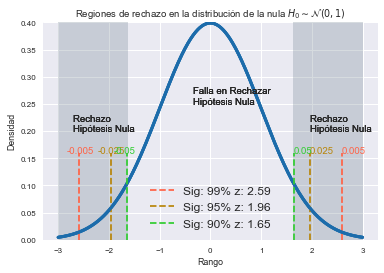

In [40]:
gfx.graph_significance();

* Volvamos a nuestro ejemplo. Si sabemos que el puntaje de la prueba -18.7 y seguimos los criterios comunes de evaluar el estadístico al 95% de confianza (1.96), hay evidencia como para rechazar la hipótesis nula dado que nuestro puntaje de |-18.7| es mayor a 1.96. De esta forma, se concluye que la media de la confianza interpersonal en el mundo distinta a .7, siendo significativa al 95% de "confianza".
* Todo este procedimiento se sintetiza con el método `ttest_1samp` del módulo `scipy.stats`, donde los argumentos necesarios son la variable a analizar y el parámetro poblacional. El método devuelve el mismo estadístico de prueba y agrega el pvalue, que en este caso es substancialmente menor a 0.

In [41]:
stats.ttest_1samp(wvs_subset['wvs_trust'], .7)

Ttest_1sampResult(statistic=-18.770596381293288, pvalue=1.2609756204715342e-22)

* El pvalue nos permite saber que tan estrictos podemos llegar a ser al momento de plantear el mismo contraste de hipótesis pero con distintos niveles de "confianza".
* Si queremos fallar en contra de la hipótesis nula con un 95% de certeza, se debe cumplir que $pvalue\leq 0.05$.
* Esta condición se satisface en nuestro ejemplo. El estadístico asociado reportó un valor de  $p-value = 1.26e-22$ lo que aporta evidencia en contra de la hipótesis nula (la media muestral es igual a la media poblacional de 0.7) hasta con un $100- 1.2609756204715342e-22 *100 = (100- 1.2609756204715342e-20)\%$ de certeza, es decir:

In [42]:
100-1.2609756204715342e-20

100.0

Prácticamente un 100% de certeza.

# ¿Y qué significa realmente que sea significativo al 95%?

* El marco analítico que utilizamos está basado en la idea de la probabilidad como repetición de eventos bajo condiciones similares. Así, el principio de interpretar el puntaje como confianza es algo polémico.
* Nuestro enunciado refleja nuestra creencia en que el resultado es distinto a .7 es del 95%. El problema es que la formulación del enunciado se basa en la repetición de eventos bajo condiciones similares.
* Por lo general, la interpretación más segura es asumir la iteración del procedimiento estadístico. En la figura generada con `gfx.confidence_intervals()` se visualiza esto de mejor manera.

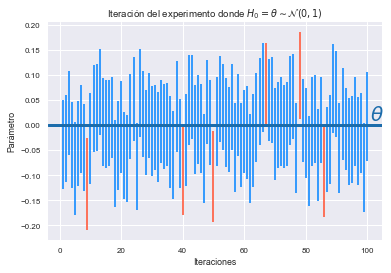

In [43]:
gfx.confidence_intervals()
plt.title(r'Iteración del experimento donde $H_{0} = \theta\sim\mathcal{N}(0,1)$');

* En el gráfico buscamos evaluar si cada experimento (líneas verticales) contienen el parámetro verdadero ($\theta$) o no. Cuando sí lo contienen las líneas verticales se visualizan como azules, de lo contrario se visualizan como rojas. Esta es la visualización más clara del 95% de confianza: __Esperamos que si repetimos este experimento 100 veces, obtendremos un resultado similar en 95 ocasiones__.
* A continuación dejo una tabla de resumen de las condiciones más comunes:

|Valor | Cobertura| Significado |
|:------|:----------|:---|
|2.58  |    99%    |Si replicamos un experimento bajo condiciones similares 100 veces, tendremos 99 ocasiones donde el estimado será similar |
|1.96  |    95%    |Si replicamos un experimento bajo condiciones similares 100 veces, tendremos 95 ocasiones donde el estimado será similar | 
| 1.86 |    90%    |Si replicamos un experimento bajo condiciones similares 100 veces, tendremos 90 ocasiones donde el estimado será similar | 


## Prueba de hipótesis para muestras independientes

* Las pruebas de hipótesis se pueden extender a múltiples escenarios. Uno de los más comunes es el comparar medias de dos grupos. Comparemos las tasas de confianza interpersonal entre los países de europa occidental y el resto del mundo.

* Las hipótesis correspondientes serían:
    - __Hipótesis Nula:__ _Las tasas de confianza interpersonal son similares entre los países de europa occidental y el resto del mundo._
    - __Hipótesis Alternativa:__ _Las tasas de confianza interpersonal son distintas entre los países de europa occidental y el resto del mundo._
    
* `scipy.stats` ofrece el método `ttest_ind` para realizar pruebas entre dos muestras independientes. Requiere como argumentos la misma columna a contrastar, separada en dos grupos.
* Vamos a recodificar la variable region en 1 para los casos pertenecientes a europa occidental y 0 para el resto del mundo.    

In [44]:
wvs_subset['western_dm'] = np.where(wvs_subset['region'] == 'WesternDem', 1, 0)

* Para separar la columna `wvs_trust` utilizaremos el método `query` que permite evaluar una expresión lógica y devolver el subconjunto de datos que satisfagan la condición.

In [45]:
stats.ttest_ind(wvs_subset.query('western_dm == 1')['wvs_trust'],
               wvs_subset.query('western_dm == 0')['wvs_trust'])

Ttest_indResult(statistic=5.108950860705963, pvalue=7.079387187592779e-06)

In [46]:
print("Media Europa Occidental:", wvs_subset.query('western_dm ==1')['wvs_trust'].mean())
print("Media Resto del Mundo:", wvs_subset.query('western_dm ==0')['wvs_trust'].mean())

Media Europa Occidental: 0.48746986333333336
Media Resto del Mundo: 0.18320053989743593


* La evidencia entregada por `ttest_ind` sugiere que la diferencia en las tasas de confianza interpersonal entre ambos grupos es significativa al 95%. Las tasas para europa occidental corresponden a .48, mientras que en el resto del mundo son .18. En promedio esperamos que los europeos presenten mayores tasas de confianza entre sí.


## Distribución T

* __Dato Rosa:__ Fue desarrollada por un empleado de la cervecería Guiness, para realizar pruebas de hipótesis.
* Es de utilidad cuando nuestras muestras son pequeñas y deseamos genear pruebas de hipótesis más exactas.
* La distribución t depende los _grados de libertad_, que repsentan en número final de valores existentes en la muestra para calcular una prueba estadística.
* Nos permite aproximarnos de forma asintótica a $X_{i}\sim\mathcal{N}(\mu, \sigma^{2})$.
* Los detalles sobre sus momentos son algo engorrosos, por lo que se omitirán.
* La distribución _t_ presenta una curva similar a la distribución normal, pero con colas más pronunciadas cuando los grados de libertad son bajos.

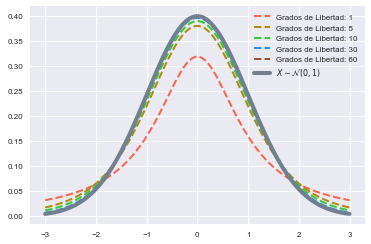

In [47]:
gfx.t_distribution()

* En el gráfico creado con `gfx.t_distribution()` se muestra el comportamiento de la distribución t en la medida que aumentan sus grados de libertad.
* Los grados de libertad son la cantidad muestral que tenemos a disposición para estimar parámetros. La forma general es $gl=(N-1)$, donde ajustamos por menos uno dado que estamos poniendo a prueba un punto estimado que emerge de la prueba.
* En la medida que los grados de libertad aumentan (asociados al tamaño muestral), el comportamiento asintótico es que tiende a acoplarse a la curva gaussiana
* Dado que sabemos sobre el comportamiento asintótico de la distribución, por lo general las disciplinas tienden a asumir normalidad de la distribución cuando nuestras muestras son grandes.
* Es importante destacar la utilidad de la distribución en aquellos casos donde las muestras son de un tamaño pequeño.

# Referencias

* (__Aspectos básicos__) Dodge, Y. 2006. The Concise Encyclopedia of Statistics:
    - p-Value: página 434.
    - Hypothesis: página 249
    - Hypothesis Testing: página 250.
    - Correlation Coefficient: página 115.
* (__Aspectos avanzados__): Casella, G; Berger, R. 2002. Statistical Inference:
    - Ch8: Hypothesis Testing
* (__Aspectos avanzados__): Aronow, P; Miller, B. 2015. Theory of Agnostic Statistics
    - Ch1: Probability Theory (Sec 1.4: Summarizing Distributions).
    